In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
from get_data import get_data
from train import train,score
import pandas as pd
import seaborn as sns
from tqdm.notebook import trange, tqdm
from model import LogisticRegression,ComplementNB,BernoulliNB

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Device used = cuda


In [2]:
ns = [10,50,100,500,2000]
augs = [4,8,16,32,64]


Xt, Yt = get_data(data_type="dev",cleanText=True)

length = len(ns)*len(augs)
data = {"n":[0]*length,
       "augs":[0]*length,
       "score":[0.0]*length,
       "vocab":[0]*length,
       "runs":[0]*length}
df = pd.DataFrame(data)

i = 0
for n in tqdm(ns):
    
    X,Y = get_data(f"clean_n_{n}",early_return=False)
#     model = LogisticRegression(max_iter=100)
#     model = BernoulliNB()
    model = LogisticRegression()
    model.fit(X,Y)
    preds = model.predict(Xt)
    acc = round((sum(preds == Yt)/len(Yt)), 3)
    df.at[i,"n"] = n
    df.at[i,"score"] = acc
    df.at[i,"vocab"] = len(model[0].vocab)
    i+=1
    for aug in augs:
        #print(f"\neda_augs_{aug}_n_{n}")
        X,Y = get_data(data_type=f"clean_eda_augs_{aug}_n_{n}")
        model = LogisticRegression(max_iter=100)
        model.fit(X,Y)
        preds = model.predict(Xt)
        acc = round((sum(preds == Yt)/len(Yt)), 3)
        df.at[i,"n"] = n
        df.at[i, "augs"] = aug
        df.at[i,"score"] = acc
        df.at[i,"vocab"] = len(model[0].vocab)
        i+=1

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Johan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Johan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [3]:
df

,n,augs,score,vocab,runs
0,10.0,0.0,0.562,180.0,0.0
1,10.0,4.0,0.580,241.0,0.0
2,10.0,8.0,0.577,275.0,0.0
3,10.0,16.0,0.579,357.0,0.0
4,10.0,32.0,0.577,470.0,0.0
5,10.0,64.0,0.574,646.0,0.0
6,50.0,0.0,0.723,943.0,0.0
7,50.0,4.0,0.679,1303.0,0.0
8,50.0,8.0,0.664,1572.0,0.0
9,50.0,16.0,0.666,1975.0,0.0


In [4]:
df.to_csv("EDA_results_LR2.csv")

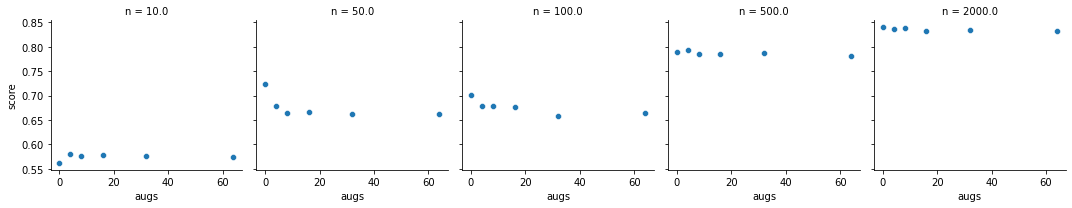

In [5]:
g = sns.FacetGrid(df,col="n")
g.map(sns.scatterplot,"augs","score")

In [9]:
for n in tqdm(ns):
    
    X,Y = get_data(f"clean_n_{n}",early_return=False)
#     model = LogisticRegression(max_iter=100)
#     model = BernoulliNB()
    print(f"n original",len(Y))
    i+=1
    for aug in augs:
        #print(f"\neda_augs_{aug}_n_{n}")
        
        X,Y = get_data(data_type=f"clean_eda_augs_{aug}_n_{n}")
        print(f"n{n}, aug{aug}, eda length",len(Y))

  0%|          | 0/5 [00:00<?, ?it/s]

n original 10
n10, aug4, eda length 50
n10, aug8, eda length 90
n10, aug16, eda length 170
n10, aug32, eda length 330
n10, aug64, eda length 650
n original 50
n50, aug4, eda length 250
n50, aug8, eda length 450
n50, aug16, eda length 850
n50, aug32, eda length 1650
n50, aug64, eda length 3250
n original 100
n100, aug4, eda length 500
n100, aug8, eda length 900
n100, aug16, eda length 1700
n100, aug32, eda length 3300
n100, aug64, eda length 6500
n original 500
n500, aug4, eda length 2500
n500, aug8, eda length 4500
n500, aug16, eda length 8500
n500, aug32, eda length 16500
n500, aug64, eda length 32500
n original 2000
n2000, aug4, eda length 10000
n2000, aug8, eda length 18000
n2000, aug16, eda length 34000
n2000, aug32, eda length 66000
n2000, aug64, eda length 130000
